In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


from keras.layers import Dense, Dropout, Activation, Flatten, Lambda
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.models import Sequential
from keras.utils import np_utils
from keras.models import model_from_json

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [17]:
df = pd.read_csv("data/driving_log.csv")
df.columns = [col.lower().strip().replace(" ","_") for col in df.columns]
df.head()

,centre_image,left_image,right_image,steering_angle,throttle,brake,speed
0,data/IMG/center_2016_12_10_19_17_11_497.jpg,data/IMG/left_2016_12_10_19_17_11_497.jpg,data/IMG/right_2016_12_10_19_17_11_497.jpg,0.0,0.0,0,0.419201
1,data/IMG/center_2016_12_10_19_17_11_597.jpg,data/IMG/left_2016_12_10_19_17_11_597.jpg,data/IMG/right_2016_12_10_19_17_11_597.jpg,0.0,0.0,0,0.414994
2,data/IMG/center_2016_12_10_19_17_11_700.jpg,data/IMG/left_2016_12_10_19_17_11_700.jpg,data/IMG/right_2016_12_10_19_17_11_700.jpg,0.0,0.0,0,0.410002
3,data/IMG/center_2016_12_10_19_17_11_809.jpg,data/IMG/left_2016_12_10_19_17_11_809.jpg,data/IMG/right_2016_12_10_19_17_11_809.jpg,0.0,0.0,0,0.405888
4,data/IMG/center_2016_12_10_19_17_11_910.jpg,data/IMG/left_2016_12_10_19_17_11_910.jpg,data/IMG/right_2016_12_10_19_17_11_910.jpg,0.0,0.0,0,0.001089


In [32]:
center_image_path = list(df['centre_image'].values)
y = list(df['steering_angle'].values)

(160, 320, 3)


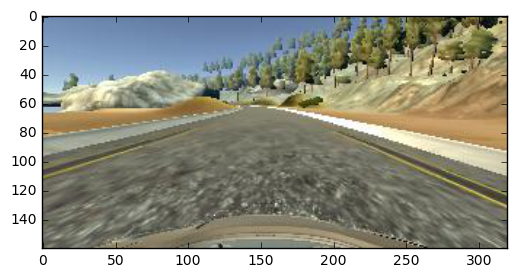

In [40]:
sample_img = mpimg.imread(center_image_path[0])
print(sample_img.shape)
plt.imshow(sample_img)

In [43]:
X = [ mpimg.imread(img) for img in center_image_path]

In [47]:
np.array(X).shape

(3471, 160, 320, 3)

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print("Train Images: ", X_train.shape[0])
print("Test Images: ", X_test.shape[0])

Train Images:  3123
Test Images:  348


In [56]:
imshape = X[0].shape

In [65]:
nb_filters1 = 16
nb_filters2 = 8
nb_filters3 = 4
nb_filters4 = 2

dropout_rate = 0.2

pool_size = (2, 2)
kernel_size = (3, 3)

model = Sequential()
model.add(Convolution2D(nb_filters1, kernel_size[0], kernel_size[1],border_mode='valid',input_shape=imshape))

model.add(Activation('relu'))
model.add(Convolution2D(nb_filters2, kernel_size[0], kernel_size[1]))

model.add(Activation('relu'))
model.add(Convolution2D(nb_filters3, kernel_size[0], kernel_size[1]))

model.add(Activation('relu'))
model.add(Convolution2D(nb_filters4, kernel_size[0], kernel_size[1]))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Dropout(dropout_rate))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error',optimizer=Adam(),metrics=['accuracy'])

In [72]:
mini_length = 50
X_mini = X_train[:mini_length]
y_mini = y_train[:mini_length]

# Train model
batch_size = 64
nb_epoch = 10

model.fit(X_mini, y_mini,batch_size=batch_size,nb_epoch=nb_epoch,validation_split=0.1,verbose=1, shuffle=True)

Train on 45 samples, validate on 5 samples
Epoch 1/10
45/45 [==============================] - 1s - loss: 0.0399 - acc: 0.7333 - val_loss: 0.0124 - val_acc: 1.0000
Epoch 2/10
45/45 [==============================] - 1s - loss: 0.0412 - acc: 0.7333 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 3/10
45/45 [==============================] - 1s - loss: 0.0416 - acc: 0.7333 - val_loss: 0.0118 - val_acc: 1.0000
Epoch 4/10
45/45 [==============================] - 1s - loss: 0.0390 - acc: 0.7333 - val_loss: 0.0116 - val_acc: 1.0000
Epoch 5/10
45/45 [==============================] - 1s - loss: 0.0389 - acc: 0.7333 - val_loss: 0.0114 - val_acc: 1.0000
Epoch 6/10
45/45 [==============================] - 1s - loss: 0.0398 - acc: 0.7333 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 7/10
45/45 [==============================] - 1s - loss: 0.0409 - acc: 0.7333 - val_loss: 0.0110 - val_acc: 1.0000
Epoch 8/10
45/45 [==============================] - 1s - loss: 0.0392 - acc: 0.7333 - val_loss: 0.0108 - val_a

In [73]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy : %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Test Accuracy : acc: 69.54%


In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model.h5")
print("Saved model to disk")